<a href="https://colab.research.google.com/github/SaraaMaher/Multiclassification-MRI/blob/main/Multiclass_MRI_Classifiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tflearn
import cv2
import glob
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras import datasets, layers, models
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from skimage.io import imread_collection
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.utils import shuffle
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Training.zip

In [ ]:
path = "/content/content/8020"
IMG_SIZE=256
MODEL_NAME="Multiclass_BrainTumor"

In [ ]:
def load_images_folder(path,l,Data,label):
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_LINEAR)
        img = img.reshape(img.shape+(1,)) 
        if img is not None:
            Data.append(img)
            label.append(l)

In [ ]:
def load_data(path2):
  fullpath=path+path2
  Data=[]
  label=[]
  load_images_folder(fullpath+"/glioma_tumor",np.array([0]),Data,label)
  load_images_folder(fullpath+"/meningioma_tumor",np.array([1]),Data,label)
  load_images_folder(fullpath+"/pituitary_tumor",np.array([2]),Data,label)

  Data=np.array(Data)
  label=np.array(label)
  return Data,label

In [ ]:
Train_Data,Train_Label=load_data("/Training")
Test_Data,Test_Label=load_data("/Testing")
Val_Data,Val_Label=load_data("/Validation")

In [ ]:
Train_Data,Train_Label=shuffle(Train_Data,Train_Label,random_state=10)

In [ ]:
Train_Label = keras.utils.to_categorical(Train_Label, 3)
Test_Label = keras.utils.to_categorical(Test_Label, 3)
Val_Label = keras.utils.to_categorical(Val_Label, 3)

(18466, 256, 256, 1)


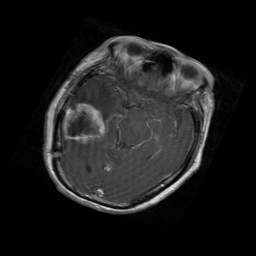

[1. 0. 0.]


In [ ]:
print(Train_Data.shape)
cv2_imshow(Train_Data[18])
 
print(Train_Label[0])

In [ ]:
import keras.backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,1)))
layers.BatchNormalization()
model.add(layers.Conv2D(64, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(96, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.Conv2D(128, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(160, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.Conv2D(192, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(224, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.Conv2D(256, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(288, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.Conv2D(320, (3,3), activation='relu'))
layers.BatchNormalization()
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(3,activation='softmax'))
opt = keras.optimizers.Adagrad(learning_rate=0.003)
model.compile(opt,loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(Train_Data,Train_Label, epochs=10,batch_size=16,validation_data=(Val_Data, Val_Label))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Train on 18466 samples, validate on 861 samples
Epoch 1/10
18466/18466 [==============================] - ETA: 0s - loss: 0.8482 - acc: 0.6289

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


18466/18466 [==============================] - 357s 19ms/sample - loss: 0.8482 - acc: 0.6289 - val_loss: 0.7659 - val_acc: 0.7015
Epoch 2/10
18466/18466 [==============================] - 357s 19ms/sample - loss: 0.4445 - acc: 0.8236 - val_loss: 0.2860 - val_acc: 0.9059
Epoch 3/10
18466/18466 [==============================] - 357s 19ms/sample - loss: 0.2522 - acc: 0.9071 - val_loss: 0.1807 - val_acc: 0.9373
Epoch 4/10
18466/18466 [==============================] - 357s 19ms/sample - loss: 0.1467 - acc: 0.9484 - val_loss: 0.1730 - val_acc: 0.9408
Epoch 5/10
18466/18466 [==============================] - 356s 19ms/sample - loss: 0.0856 - acc: 0.9711 - val_loss: 0.1164 - val_acc: 0.9698
Epoch 6/10
18466/18466 [==============================] - 357s 19ms/sample - loss: 0.0481 - acc: 0.9842 - val_loss: 0.1504 - val_acc: 0.9593
Epoch 7/10
18466/18466 [==============================] - 357s 19ms/sample - loss: 0.0296 - acc: 0.9921 - val_loss: 0.1238 - val_acc: 0.9652
Epoch 8/10
18466/18466 [

0.96747214


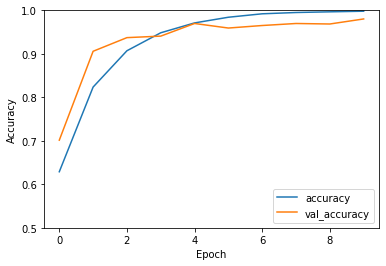

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(Test_Data,Test_Label, verbose=2)
print(test_acc)

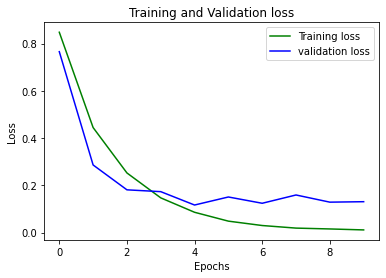

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save("smulti967.tfl")

In [ ]:
def main_run(img):
 from keras.models import load_model
 model = load_model('/content/smulti967.tfl')
 IMG_SIZE=256
 img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
 img = np.expand_dims(img, axis=0)
 img = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
 prediction=[]
 prediction = model.predict(img)
 print(prediction)
 if(prediction[0][0]>prediction[0][1] and prediction[0][0]>prediction[0][2]):
  print("glioma_tumor")
 elif(prediction[0][1]>prediction[0][0] and prediction[0][1]>prediction[0][2]):
  print("meningioma_tumor")
 else:
  print("pituitary_tumor")

In [ ]:
from keras.models import load_model
model = load_model('/content/MulticlassModel.tfl')

In [ ]:
y_predict=model.predict(Test_Data)

In [ ]:
print(y_predict.shape)
print(y_predict[2][2])

(2095, 3)
3.1511652e-14


In [ ]:
classes_x=np.argmax(y_predict,axis=1)

In [ ]:
y_predict = y_predict[:, 0]


In [ ]:
for i in range(len(y_predict)):
  if(y_predict[i][0]>y_predict[i][1] and y_predict[i][0]>y_predict[i][2]):
     y_predict[i]=[1,0,0]
  elif(y_predict[i][1]>y_predict[i][0] and y_predict[i][1]>y_predict[i][2]):
     y_predict[i]=[0,1,0]
  else:
    y_predict[i]=[0,0,1]

In [ ]:
print(y_predict[2])

[1. 0. 0.]


In [ ]:
print(classes_x[44])
print(Test_Label[44])

0
[0]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
matrix = multilabel_confusion_matrix(Test_Label, classes_x,labels=[0,1,2])
print(matrix)

[[[688   6]
  [ 18 364]]

 [[731  17]
  [ 11 317]]

 [[698  12]
  [  6 360]]]


In [ ]:
glioma=np.flip(matrix[0]) 
menin=np.flip(matrix[1]) 
pitut=np.flip(matrix[2]) 

In [ ]:
print(glioma)
acc = (glioma[0][0] + glioma[-1][-1]) / np.sum(glioma)
prec=(glioma[0][0]/(glioma[0][0]+glioma[1][0]))
recall=(glioma[0][0]/(glioma[0][0]+glioma[0][1]))
sp=(glioma[1][1]/(glioma[1][1]+glioma[1][0]))
F1  = 2 * (prec * recall) / (prec + recall)
print(acc)
print(prec)
print(recall)
print(sp)
print(F1)

[[364  18]
 [  6 688]]
0.9776951672862454
0.9837837837837838
0.9528795811518325
0.9913544668587896
0.9680851063829787


In [ ]:
print(menin)
acc = (menin[0][0] + menin[-1][-1]) / np.sum(menin)
prec=(menin[0][0]/(menin[0][0]+menin[1][0]))
recall=(menin[0][0]/(menin[0][0]+menin[0][1]))
sp=(menin[1][1]/(menin[1][1]+menin[1][0]))
F1  = 2 * (prec * recall) / (prec + recall)
print(acc)
print(prec)
print(recall)
print(sp)
print(F1)

[[317  11]
 [ 17 731]]
0.9739776951672863
0.9491017964071856
0.9664634146341463
0.9772727272727273
0.957703927492447


In [ ]:
print(pitut)
acc = (pitut[0][0] + pitut[-1][-1]) / np.sum(pitut)
print(acc)
prec=(pitut[0][0]/(pitut[0][0]+pitut[1][0]))
print(prec)
recall=(pitut[0][0]/(pitut[0][0]+pitut[0][1]))
sp=(pitut[1][1]/(pitut[1][1]+pitut[1][0]))
F1  = 2 * (prec * recall) / (prec + recall)
print(recall)
print(sp)
print(F1)

[[360   6]
 [ 12 698]]
0.983271375464684
0.967741935483871
0.9836065573770492
0.9830985915492958
0.975609756097561
